# Data Imbalance Handling by OverSampling, UnderSampling, Both Sampling and SMOTE with Random Forest Classifier
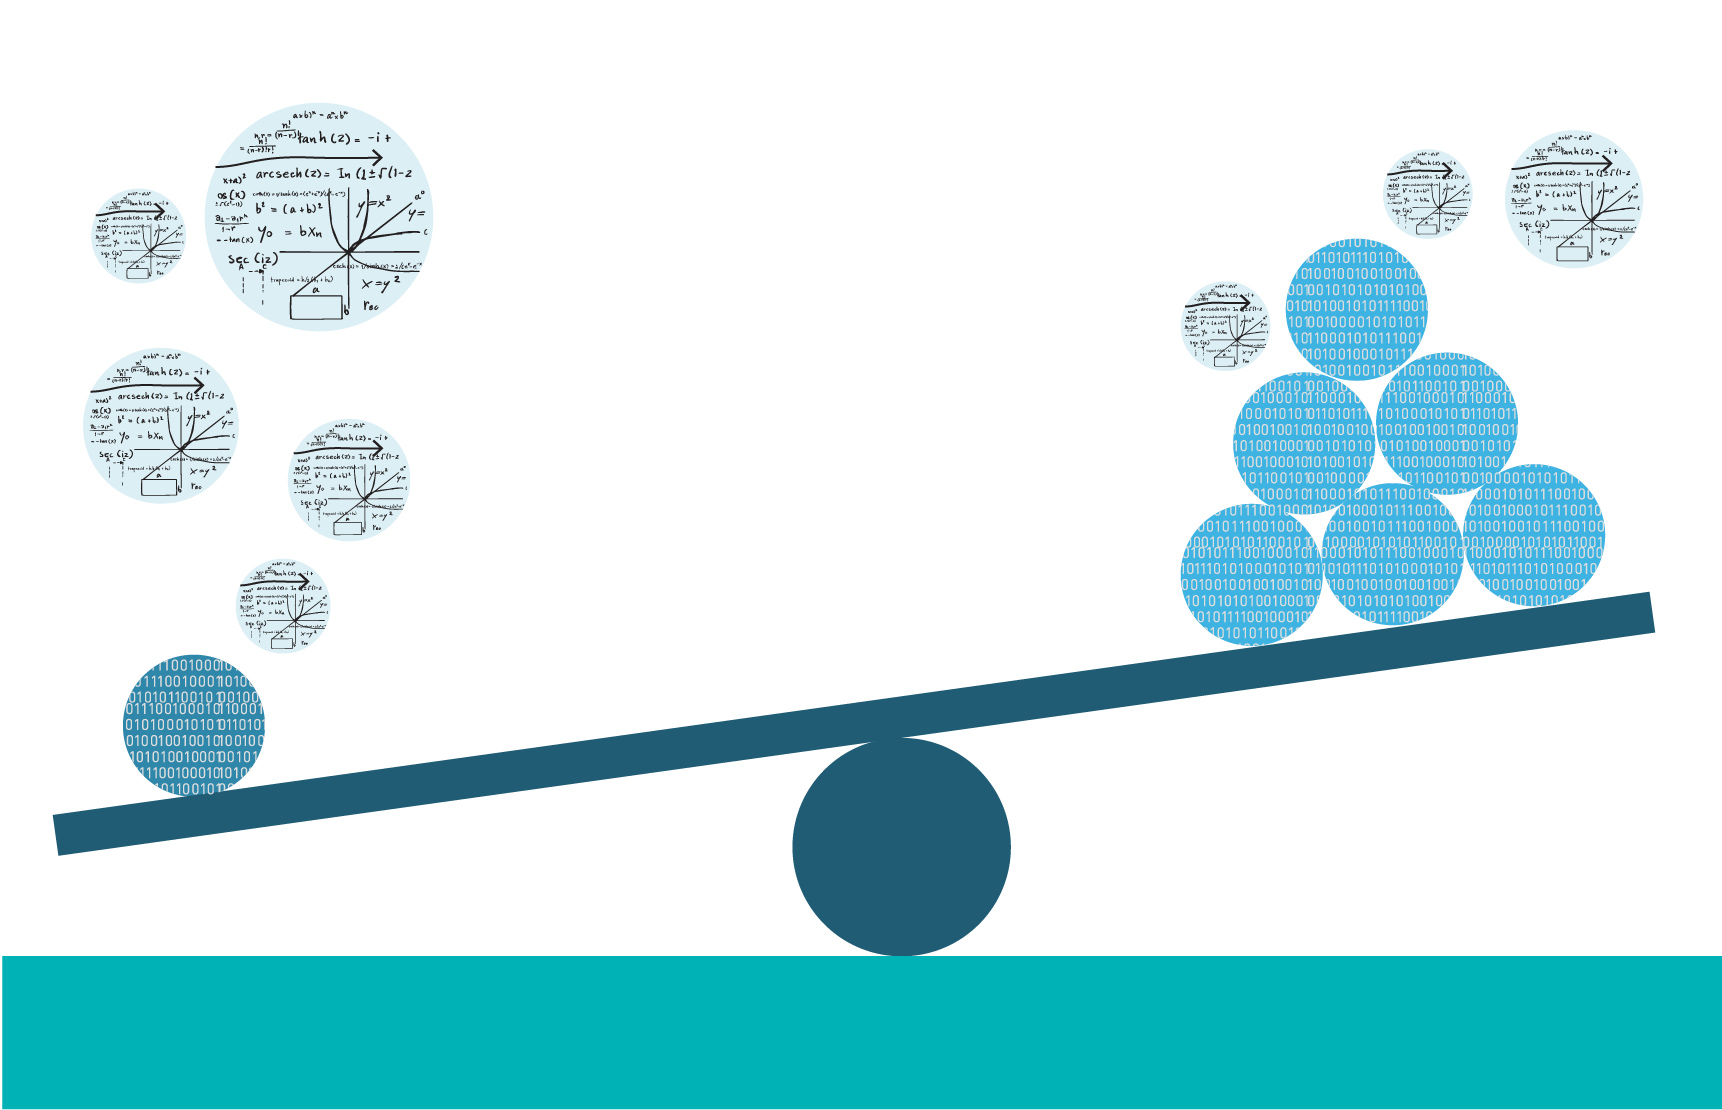

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Reading Dataset

In [4]:
df = pd.read_csv("aug_train.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [5]:
df.shape

(382154, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


In [7]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Looking for missing Values

<AxesSubplot:>

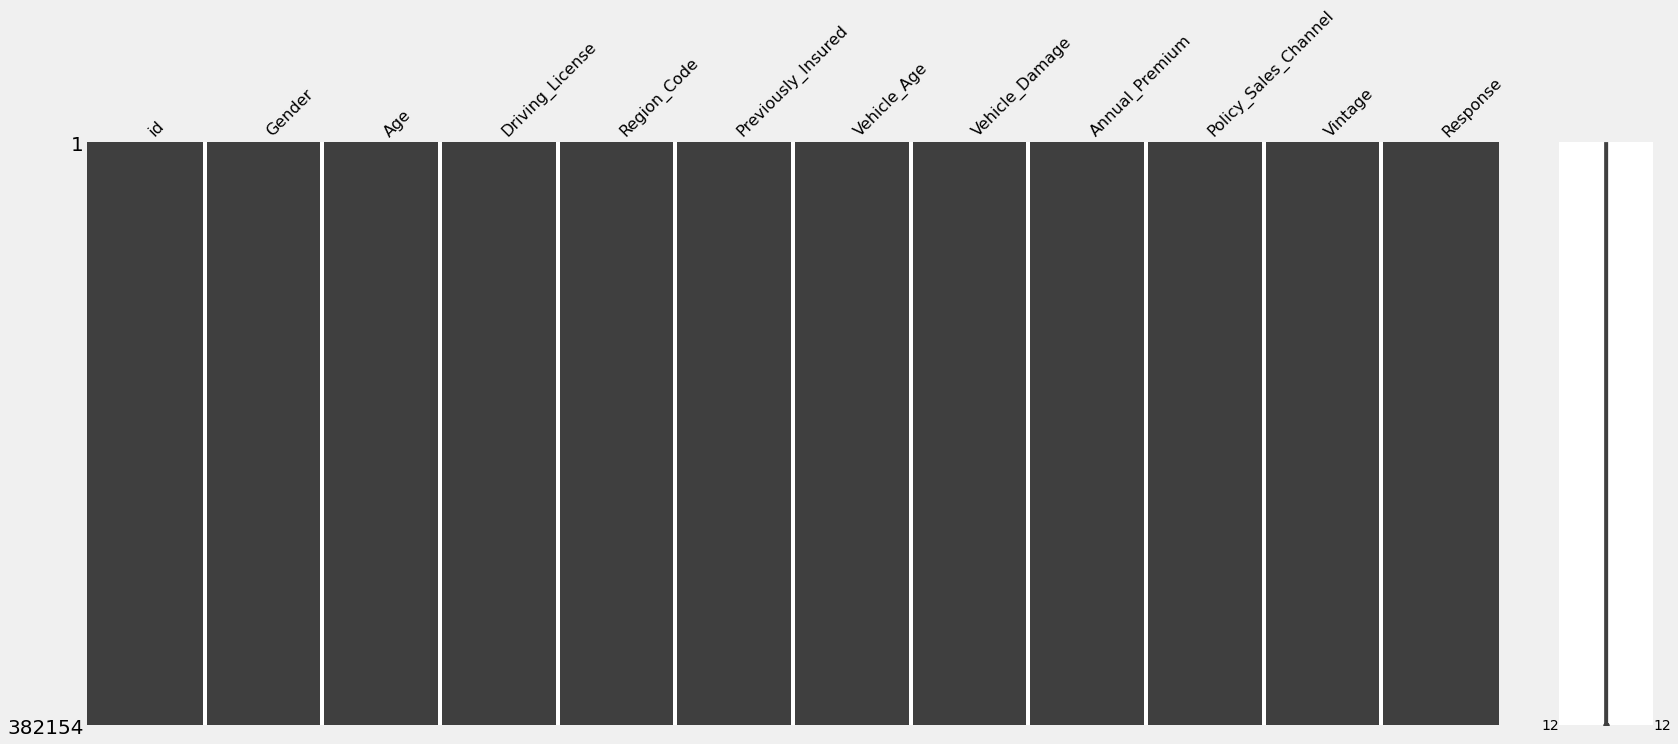

In [8]:
import missingno as m
m.matrix(df)

## No missing Values

In [9]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


# Data Preprocessing

In [10]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [11]:
df.Driving_License.unique()

array([1, 0], dtype=int64)

In [12]:
df.Region_Code.unique()

array([ 7., 28., 33., 46., 25.,  8., 41., 39., 13., 14., 36.,  3., 43.,
       45., 48., 11., 30., 15.,  6., 50., 38., 19., 34., 22., 29., 35.,
       12., 37.,  4., 10., 40., 24., 31., 21.,  2., 52.,  9., 49.,  5.,
       47.,  1., 20., 42., 27., 26., 32., 18., 16., 17., 51.,  0., 23.,
       44.])

In [13]:
df.Previously_Insured.unique()

array([1, 0], dtype=int64)

In [14]:
df.Vehicle_Age.unique()  

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [15]:
df.Vehicle_Damage.unique()

array(['No', 'Yes'], dtype=object)

# Labelling the Categorical Variables

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Vehicle_Age'] = le.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = le.fit_transform(df['Vehicle_Damage'])


# Dropping the ID and Region_Code Column

In [17]:
df = df.drop(columns=['Region_Code','id'])

# Heatmap

<AxesSubplot:>

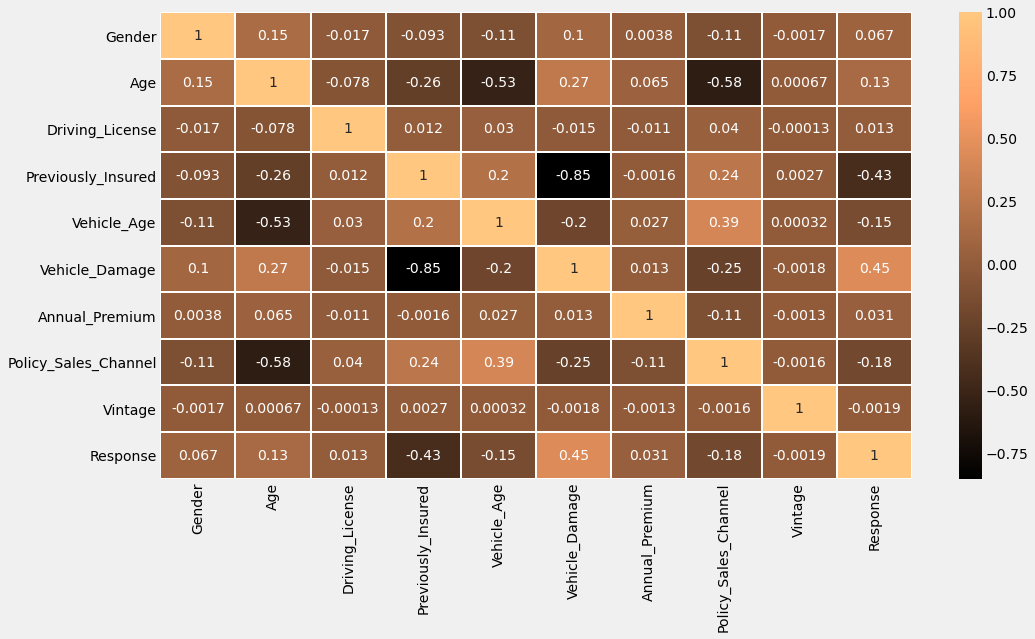

In [18]:
plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(), annot= True, linewidth =1, cmap='copper')

In [19]:
df.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,22,1,1,1,0,2630.0,152.0,16,0
1,1,42,1,0,0,1,43327.0,26.0,135,0
2,0,66,1,0,0,1,35841.0,124.0,253,0
3,0,22,1,0,1,0,27645.0,152.0,69,0
4,1,28,1,1,1,0,29023.0,152.0,211,0


# Data Imbalance

In [20]:
df.Response.value_counts()

0    319553
1     62601
Name: Response, dtype: int64

## The number of label 0s are way more than label 1

<AxesSubplot:xlabel='Response', ylabel='count'>

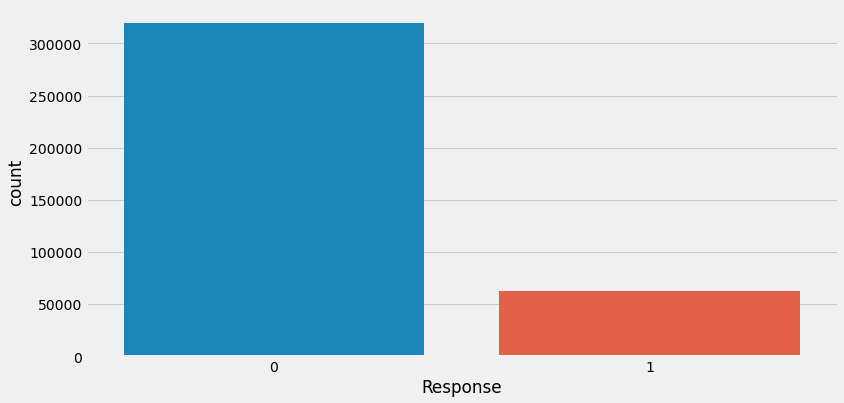

In [21]:
plt.subplots(figsize=(12,6))
sns.countplot(x='Response', data=df)

In [22]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Response'],
      dtype='object')

# X and y Split

In [23]:
X= df[['Gender', 'Age', 'Driving_License','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']]
y= df['Response']

In [24]:
X.shape,y.shape

((382154, 9), (382154,))

## There are many ways to fix this Data Imbalance problem, I have taken 4 ways here

* **Random Over Sampling**
* **Random Under Sampling**
* **SMOTE**
* **Both Over and Under Sampling**

# Random Over Sampling

In [26]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
  Using cached scikit_learn-1.1.1-cp38-cp38-win_amd64.whl (7.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.24.1.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [27]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
X_over, y_over = oversample.fit_resample(X, y)

# Before Over Sampling

In [ ]:
y.value_counts()

# After Over Sampling

In [ ]:
y_over.value_counts()

In [ ]:
plt.subplots(figsize=(12,6))
sns.countplot(x=y_over)

## The Label Values are Equal Now

# Random Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')

In [ ]:
X_under, y_under = undersample.fit_resample(X, y)

# Before Under Sampling

In [ ]:
y.value_counts()

# After Under Sampling

In [ ]:
y_under.value_counts()

In [ ]:
plt.subplots(figsize=(12,6))
sns.countplot(x=y_under)

## The Label Values are Equal Now

# SMOTE - Synthetic Minority Over Sampling Technique

Its also a oversampling technique but it does not do oversampling randomly like random oversampler

SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X, y)

# Before SMOTE

In [ ]:
y.value_counts()

# After SMOTE

In [ ]:
y_smote.value_counts()

In [ ]:
plt.subplots(figsize=(12,6))
sns.countplot(x=y_smote)

## The Label Values are Equal Now

# Both Over and Under Sampling

In [ ]:
over = RandomOverSampler(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.5)

In [ ]:
X_both, y_both = over.fit_resample(X, y)

# Before Sampling

In [ ]:
y.value_counts()

# After Both Sampling

In [ ]:
y_both.value_counts()

In [ ]:
X_both, y_both = under.fit_resample(X_both, y_both)

In [ ]:
y_both.value_counts()

In [ ]:
plt.subplots(figsize=(12,6))
sns.countplot(x=y_both)

## The 1 label increased. The combination of over sampling and undersampling can be very effective with different sampling_strategy

# Train Test Split for all the Cases

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.25, random_state = 0)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size = 0.25, random_state = 0)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size = 0.25, random_state = 0)
X_train_both, X_test_both, y_train_both, y_test_both = train_test_split(X_both, y_both, test_size = 0.25, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X_train_over.shape, X_test_over.shape, y_train_over.shape, y_test_over.shape

In [ ]:
X_train_under.shape, X_test_under.shape, y_train_under.shape, y_test_under.shape

In [ ]:
X_train_smote.shape, X_test_smote.shape, y_train_smote.shape, y_test_smote.shape

In [ ]:
X_train_both.shape, X_test_both.shape, y_train_both.shape, y_test_both.shape

# Building Random Forest Classifier for all the Cases

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)

rfc_over = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc_over.fit(X_train_over, y_train_over)

rfc_under = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc_under.fit(X_train_under, y_train_under)

rfc_smote = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc_smote.fit(X_train_smote, y_train_smote)

rfc_both = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc_both.fit(X_train_both, y_train_both)

# Prediction of Test Set for all the Cases

In [ ]:
y_pred = rfc.predict(X_test)
y_pred_over = rfc_over.predict(X_test_over)
y_pred_under = rfc_under.predict(X_test_under)
y_pred_smote = rfc_smote.predict(X_test_smote)
y_pred_both = rfc_smote.predict(X_test_both)

In [ ]:
y_test=y_test.values
y_test_over=y_test_over.values
y_test_under=y_test_under.values
y_test_smote=y_test_smote.values
y_test_both=y_test_both.values

# Predicted Value and Actual Value for all the Cases

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
print(np.concatenate((y_pred_over.reshape(len(y_pred_over),1), y_test_over.reshape(len(y_test_over),1)),1))

In [ ]:
print(np.concatenate((y_pred_under.reshape(len(y_pred_under),1), y_test_under.reshape(len(y_test_under),1)),1))

In [ ]:
print(np.concatenate((y_pred_smote.reshape(len(y_pred_smote),1), y_test_smote.reshape(len(y_test_smote),1)),1))

In [ ]:
print(np.concatenate((y_pred_both.reshape(len(y_pred_both),1), y_test_both.reshape(len(y_test_both),1)),1))

# For Normal Case

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot= True, linewidth =1, cmap='nipy_spectral_r')

In [ ]:
print("Accuracy for Normal dataset : ",accuracy_score(y_test, y_pred))

# For Random Over Sampler Case

In [ ]:
cm_over = confusion_matrix(y_test_over, y_pred_over)
print(cm_over)


In [ ]:
plt.subplots(figsize=(10,5))
sns.heatmap(cm_over, annot= True, linewidth =1, cmap='YlGnBu_r')

In [ ]:
print("Accuracy for Over Sampled dataset : ",accuracy_score(y_test_over, y_pred_over))

# For Random Under Sampler Case

In [ ]:
cm_under = confusion_matrix(y_test_under, y_pred_under)
print(cm_under)

In [ ]:
plt.subplots(figsize=(10,5))
sns.heatmap(cm_under, annot= True, linewidth =1, cmap='CMRmap')

In [ ]:
print("Accuracy for Under Sampled dataset : ",accuracy_score(y_test_under, y_pred_under))

# For SMOTE Case

In [ ]:
cm_smote = confusion_matrix(y_test_smote, y_pred_smote)
print(cm_smote)
accuracy_score(y_test_smote, y_pred_smote)

In [ ]:
plt.subplots(figsize=(10,5))
sns.heatmap(cm_smote, annot= True, linewidth =1, cmap='gist_gray_r')

In [ ]:
print("Accuracy for SMOTE dataset : ",accuracy_score(y_test_smote, y_pred_smote))

# For Both Over and Under Sampling Case 

In [ ]:
cm_both = confusion_matrix(y_test_both, y_pred_both)
print(cm_both)

In [ ]:
plt.subplots(figsize=(10,5))
sns.heatmap(cm_both, annot= True, linewidth =1, cmap='tab20')

In [ ]:
print("Accuracy for Both Over and Under Sampled dataset : ",accuracy_score(y_test_both, y_pred_both))

# 10 fold Cross Validation for all the Cases

**K fold Crossvalidation itself is used to check data imbalance problem. I am performing this to check which Cases works best for this dataset**

## For Normal Case

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X, y, cv=10, scoring='f1_macro')
print(score)

## For Random Over Sampler Case

In [ ]:
score_over = cross_val_score(rfc_over, X_over, y_over, cv=10, scoring='f1_macro')
print(score_over)

## For Random Under Sampler Case

In [ ]:
score_under = cross_val_score(rfc_under, X_under, y_under, cv=10, scoring='f1_macro')
print(score_under)

## For SMOTE Case

In [ ]:
score_smote = cross_val_score(rfc_smote, X_smote, y_smote, cv=10, scoring='f1_macro')
print(score_smote)

## For Both Oversampling and Undersampling Case

In [ ]:
score_both = cross_val_score(rfc_both, X_both, y_both, cv=10, scoring='f1_macro')
print(score_both)

# Saving the Accuracies into a Data frame 

In [ ]:
dff = pd.DataFrame()
dff['Normal'] = score
dff['Over Sampling'] = score_over
dff['Under Sampling'] = score_under
dff['SMOTE'] = score_smote
dff['Both Sampling'] = score_both

In [ ]:
dff

# Plotting the Accuracy Chart 

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(y=dff['Normal'], name='Normal',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter(y=dff['Over Sampling'], name = 'Over Sampling',
                         line=dict(color='firebrick', width=3)))
fig.add_trace(go.Scatter(y=dff['Under Sampling'], name = 'Under Sampling',
                         line=dict(color='orchid', width=3)))
fig.add_trace(go.Scatter(y=dff['SMOTE'], name = 'SMOTE',
                         line=dict(color='forestgreen', width=3)))
fig.add_trace(go.Scatter(y=dff['Both Sampling'], name = 'Both Sampling',
                         line=dict(color='chocolate', width=3)))

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(y=dff['Normal'], name='Normal',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter(y=dff['Over Sampling'], name = 'Over Sampling',
                         line=dict(color='firebrick', width=3)))
fig.add_trace(go.Scatter(y=dff['Under Sampling'], name = 'Under Sampling',
                         line=dict(color='orchid', width=3)))
fig.add_trace(go.Scatter(y=dff['SMOTE'], name = 'SMOTE',
                         line=dict(color='forestgreen', width=3)))
fig.add_trace(go.Scatter(y=dff['Both Sampling'], name = 'Both Sampling',
                         line=dict(color='chocolate', width=3)))


fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)
fig.update_layout(title='Styled Scatter',
                  yaxis_zeroline=False, xaxis_zeroline=False)

* **For our dataset Random Over Sampler got the highest Accuracy** 
* **After that SMOTE work Best**
* **Then Under Sampling came in the Picture**
* **Both Over and Under Sampling Came in the fourth place**
* **And the least one is normal Data set**

# So, It is proven that data Imbalance is a big issue and by sampling it can be solved.